##### Copyright 2018 The TensorFlow Authors.

```python
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
```

```python
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
```

# 文本分类：影评情感分类

<table align="left"><td>
<a target="_blank"  href="https://github.com/tensorflow/models/blob/master/samples/core/get_started/basic_text_classification.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on Github</a></td></table>

本例将影评样本分类为*positive*或*negative*两类，演示使用TensorFlow搭建文本二分类模型。

本例使用TensorFlow内嵌的[IMDB数据集](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb)，包含50000条来自[在线电影数据集](https://www.imdb.com/)的影评。其中包含25000条训练样本与25000条测试样本，训练集与测试集已经经过平衡，即正负样本数相同。

本例使用了TensorFlow中高度封装的[tf.keras](https://www.tensorflow.org/programmers_guide/keras)接口。
## 引入依赖

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.15.0


In [ ]:
print("123")

: 

## 下载IMDB数据集

IMDB数据集已经经过TensorFlow的预处理与包装，样本中每个词用该词的词典序号表示。

以下代码将下载IMDB数据集：

In [2]:
imdb = keras.datasets.imdb
import numpy as np
import os

path = '/home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/'
data_path = os.path.join(path, 'imdb.npz')
print(data_path)

/home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/imdb.npz


In [3]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(data_path,num_words=10000)


#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


参数`num_words=10000`在词典中保留了训练集中词频最高的10000个词，低频词被抛弃以控制数据集大小。

## 数据格式

数据集已经经过预处理：每个样本对应一条影评的一个整数序列，样本标签为0或1，0表示消极影评，1表示积极影评。

In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


影评文本中的词被转换为词对应的词典序号，训练集中的第一条样本如下：

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


影评文本是变长的：

In [6]:
len(train_data[0]), len(train_data[1])

(218, 189)

### 将词典序号转换回词的形式

以下代码演示将词典序号转换回对应的词：

In [7]:
# （词，序号）字典

word_index_path = os.path.join(path, 'imdb_word_index.json')
print(word_index_path)
word_index = imdb.get_word_index(word_index_path)
# 加入几种占位符
word_index = {k: (v + 3) for k, v in word_index.items()} 
word_index["<PAD>"] = 0    # 填充
word_index["<START>"] = 1  # 样本起点
word_index["<UNK>"] = 2    # 未知词
word_index["<UNUSED>"] = 3 # 停用词
# 翻转键值
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 定义文本解析函数
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

/home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/imdb_word_index.json


接下来就可以利用`decode_review`查看训练集中样本的真实内容：

In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 数据准备

整数序列形式的样本数据在灌入神经网络模型前需要转换为Tensor的形式，通常有以下2种词表示形式：

* 独热码：独热码可以将一个词表示为词典长度的0/1向量，其中只有当前词的序号对应的向量元素值为1。这种形式空间开销比较大，整个数据集需要`num_words * num_reviews`大小的矩阵来表示。

* 词嵌入：用词嵌入技术可以只用`num_examples * max_length`的空间开销来表示数据集，它将每个词映射到一个长度为`max_length`的向量上。TensorFlow提供对词嵌入层的支持。

本例使用词嵌入技术表示词。 

本例使用[pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) 函数，将变长的样本填充为统一长度:

In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

现在训练集样本已经经过了归一化：

In [10]:
len(train_data[0]), len(train_data[1])

(256, 256)

看一下填充到256固定长度的样本：

In [11]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 搭建模型

堆叠层次结构搭建神经网络模型时需要考虑两个问题：

* 模型需要多少层？
* 每层需要多少*隐含单元（神经元）* ？

本例中，模型输入层为词序列，输出预测标签为0或1。模型定义如下：

In [12]:
# 输入尺寸为影评词典尺寸即
vocab_size = 10000

model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


本例中的分类器将4个层次结构按顺序堆叠而成：

1. 第一层是`Embedding`层，该层将词嵌入到高维向量，该层与模型一起参与训练，输出shape为`(batch, sequence, embedding)`的3维矩阵。
2. `GlobalAveragePooling1D`层在`sequence`的维度上做全局平均， 输出shape为`(batch, embedding)`的2维矩阵。
3. 接下来经过一个包含16个隐含单元的全连接 (`Dense`) 层。
4. 最后一层为包含一个隐含结点的全连接层，使用`sigmoid`激活函数，输出0与1之间的浮点数，代表概率或置信度。表示样本是否为积极样本。

以下代码为模型配置优化器、损失函数和评估方法并编译模型：

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 创建验证集

模型调试阶段，为验证模型收敛状态，需要设置验证集，本例从训练集中分出10000个样本作为验证集：

In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 训练模型

训练模型20轮，设置mini-batches尺寸为512。训练时，监控验证集上的loss和准确率变化：

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 77us/sample - loss: 0.6918 - acc: 0.6131 - val_loss: 0.6897 - val_acc: 0.5996
Epoch 2/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.6859 - acc: 0.7023 - val_loss: 0.6822 - val_acc: 0.7470
Epoch 3/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6745 - acc: 0.7645 - val_loss: 0.6681 - val_acc: 0.7636
Epoch 4/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6547 - acc: 0.7688 - val_loss: 0.6454 - val_acc: 0.7641
Epoch 5/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.6252 - acc: 0.7972 - val_loss: 0.6142 - val_acc: 0.7856
Epoch 6/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.5868 - acc: 0.8158 - val_loss: 0.5766 - val_acc: 0.8024
Epoch 7/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.5425 - acc: 0.8261 - val_loss: 0.

## 评估模型

下面在测试集上评估模型性能：

In [16]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 2s 61us/sample - loss: 0.3125 - acc: 0.8720


In [17]:
print(results)

[0.3124636759567261, 0.87204]


这个简单模型已经能达到约%85的正确率，经过更高级的改进，模型可以达到接近%95的正确率。

## 可视化呈现训练过程

`model.fit()`返回一个包含各种训练信息字典的`History`对象:

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

训练信息包括训练集和验证集上的loss和准确率，可以利用这些数据生成可视化训练过程：

In [19]:
import matplotlib.pyplot as plt

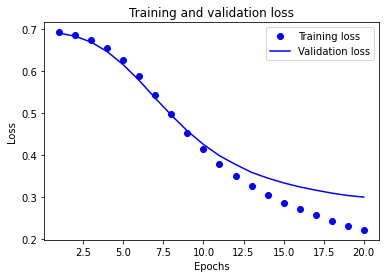

In [20]:
plt.clf()   # 清空图片
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
# "bo" 是蓝点
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" 是蓝色实线
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

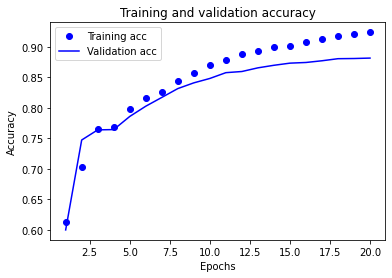

In [21]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

图中，点表示训练上的loss和准确率，实线表示验证集上的loss和准确率。loss随模型训练降低，准确率随模型训练升高，接近20轮时，训练集与验证集上loss和准确率开始有差距，这是模型在训练集上过拟合的例子，如果继续训练，模型在验证集和测试集上泛化能力将会下降。一种简单的解决方法是，我们最好在第20轮结束模型训练。

In [22]:
#save model
model_save_path = os.path.join(path, 'model.h5')
print(model_save_path)


model.save(model_save_path)

/home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/model.h5


In [24]:
!bmlmodel config -a super-user -s 59005119-88cf-11e8-8227-90e2ba1fdc4b

Info: Config accesskey and secretkey success.


发布模型

In [27]:
print(path)

/home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/


In [29]:
!bmlmodel publish -l /home/bml/storage/mnt/v-tl8enminw01tlrkr/org/pocdemo/ -p newmodel -n imdb_model -v 1.0.0.0

Push model to model repository completed.


In [24]:
#预测服务，测试数据

{
    "data": {
        "data": {
            "0": "<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"
        }
    }
}

{'data': {'data': {'0': "<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and 